In [ ]:
import pandas as pd
from nltk.corpus import stopwords
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Make data directory if it doesn't exist
!mkdir -p data
!wget -nc https://nyc3.digitaloceanspaces.com/ml-files-distro/v1/sentiment-analysis-is-bad/data/training.1600000.processed.noemoticon.csv.zip -P data
!unzip -n -d data data/training.1600000.processed.noemoticon.csv.zip

File ‘data/training.1600000.processed.noemoticon.csv.zip’ already there; not retrieving.

Archive:  data/training.1600000.processed.noemoticon.csv.zip


In [ ]:
columns = ["sentiment", "id", "date", "query", "user_id", "text"]
df = pd.read_csv("data/training.1600000.processed.noemoticon.csv", encoding="latin",names=columns)
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df["sentiment"] = df["sentiment"].replace(4,1)

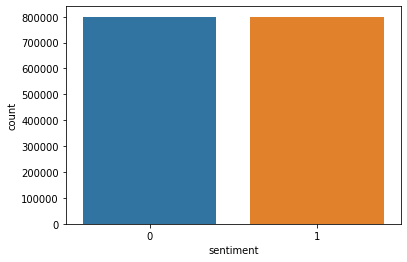

In [ ]:
sns.countplot(x="sentiment",data=df)

In [ ]:
# removing stop words, urls from the dataset
import nltk

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer

In [ ]:
negative_tweets = df[df['sentiment'] == 0]['text'].tolist()[6996:7996]
positive_tweets = df[df['sentiment'] == 1]['text'].tolist()[1331:2331]


len(negative_tweets), len(positive_tweets)

(1000, 1000)

In [ ]:
# Removing hyperlinks and hashtags

import random

tweet = positive_tweets[random.randint(0,len(positive_tweets))]
print('\033[92m'+tweet)
print('\033[93m')

# remove hyperlinks
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*','',tweet);

# remove hashtags
# only removing the hash sign from the word
tweet2 = re.sub(r'#','',tweet2)

print(tweet2)

@billt Pint of Adnams? Glad to see you're taking advantage of Cask Ale Week 

@billt Pint of Adnams? Glad to see you're taking advantage of Cask Ale Week 


In [ ]:
# Tokenizing the string

tokenizer = TweetTokenizer(preserve_case=False)

tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string: ')
print(tweet_tokens)


Tokenized string: 
['@billt', 'pint', 'of', 'adnams', '?', 'glad', 'to', 'see', "you're", 'taking', 'advantage', 'of', 'cask', 'ale', 'week']


In [ ]:
# Removing the stopwords

stopwords_english = stopwords.words('english')

print(stopwords_english)

print(string.punctuation)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
positive_tweets[0]

'is very excited, SkyHD is coming today '

In [ ]:
import re

# Now using all the knowledge, creating clean positive and negative tweets

# Step 1 - Remove hyperlinks and hashtags
for i in range(len(positive_tweets)):
  positive_tweets[i] = re.sub(r'''(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*''','',positive_tweets[i]);
  positive_tweets[i] = re.sub(r'#','',positive_tweets[i])
  negative_tweets[i] = re.sub(r'''(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*''','',negative_tweets[i]);
  negative_tweets[i] = re.sub(r'#','',negative_tweets[i])

# Step 2 - Tokenize the string

tokenizer = TweetTokenizer(preserve_case=False)

for i in range(len(positive_tweets)):
  positive_tweets[i] = tokenizer.tokenize(positive_tweets[i])
  negative_tweets[i] = tokenizer.tokenize(negative_tweets[i])

# Step 3 - Remove the stopwords and punctuations
for i in range(len(positive_tweets)):
  temp_pos = [*positive_tweets[i]]
  positive_tweets[i] = []
  for word in temp_pos:
    if (word not in stopwords_english and word not in string.punctuation):
      positive_tweets[i].append(word)

  temp_neg = [*negative_tweets[i]]
  negative_tweets[i] = []
  for word in temp_neg:
    if (word not in stopwords_english and word not in string.punctuation):
      negative_tweets[i].append(word)

In [ ]:
positive_tweets_storage = positive_tweets
negative_tweets_storage = negative_tweets

positive_tweets[0], negative_tweets[0]

(['excited', 'skyhd', 'coming', 'today'], ['sad', 'want', 'cry'])

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
# Lemmatizing all the tweets

print(positive_tweets[10][2])

for i in range(len(positive_tweets)):
  for j in range(len(positive_tweets[i])):
    # print("here->",positive_tweets[i][j])
    positive_tweets[i][j] = WordNetLemmatizer().lemmatize(positive_tweets[i][j],'v')

for i in range(len(negative_tweets)):
  for j in range(len(negative_tweets[i])):
    negative_tweets[i][j] = WordNetLemmatizer().lemmatize(negative_tweets[i][j],'v')

positive_tweets[0], negative_tweets[0]

built


(['excite', 'skyhd', 'come', 'today'], ['sad', 'want', 'cry'])

In [ ]:
positive_text = []
negative_text = []
for wordlist in positive_tweets:
  positive_text = [*positive_text, " ".join(wordlist)]

for wordlist in negative_tweets:
  negative_text = [*negative_text, " ".join(wordlist)]

In [ ]:
positive_text[324], negative_text[142]

('@mommybrain safe travel congrats new move', 'late work hop trouble ...')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

vectorizer = CountVectorizer()

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

data = []
data_labels = []

for word in positive_text:
  data.append(word)
  data_labels.append(1)

for word in negative_text:
  data.append(word)
  data_labels.append(0)

features = vectorizer.fit_transform(data)
features_nd = features.toarray()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features_nd,
    data_labels,
    train_size = 0.85,
    random_state = 31
)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(features_nd, data_labels)

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
print("F1 score:",metrics.f1_score(y_test,y_pred))

Accuracy: 0.9266666666666666
Precision: 0.9370629370629371
Recall: 0.9115646258503401
F1 score: 0.9241379310344827


Now implementing decision tree classifier

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_tree_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_tree_pred))
print("Precision:",metrics.precision_score(y_test,y_tree_pred))
print("Recall:",metrics.recall_score(y_test,y_tree_pred))
print("F1 score:",metrics.f1_score(y_test,y_tree_pred))

Accuracy: 0.67
Precision: 0.6428571428571429
Recall: 0.7346938775510204
F1 score: 0.6857142857142857


In [ ]:
import pandas as pd
import numpy as np

naive_bayes = [metrics.accuracy_score(y_test, y_pred),
     metrics.precision_score(y_test,y_pred),
     metrics.recall_score(y_test,y_pred),
     metrics.f1_score(y_test,y_pred)]

decision_tree = [metrics.accuracy_score(y_test, y_tree_pred),
     metrics.precision_score(y_test,y_tree_pred),
     metrics.recall_score(y_test,y_tree_pred),
     metrics.f1_score(y_test,y_tree_pred)]

df = pd.DataFrame([naive_bayes,decision_tree], index=['Naive Bayes', 'Decision Tree'], columns=['Accuracy','Precision','Recall','F1 Score'])
df

,Accuracy,Precision,Recall,F1 Score
Naive Bayes,0.926667,0.937063,0.911565,0.924138
Decision Tree,0.670000,0.642857,0.734694,0.685714


Hence, we can see that in this case, Naive Bayes performs way better than Decision tree